<a href="https://colab.research.google.com/github/nilishalu/WE-Machine-Learning-Sessions/blob/main/Sessions/WE_20221117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#For seeing the first 10 data items in linux

!head /ghw.csv


Gender,Height,Weight
"Male",73.84701702,241.8935632
"Male",68.78190405,162.3104725
"Male",74.11010539,212.7408556
"Male",71.7309784,220.0424703
"Male",69.88179586,206.3498006
"Male",67.25301569,152.2121558
"Male",68.78508125,183.9278886
"Male",68.34851551,167.9711105
"Male",67.01894966,175.9294404


In [ ]:
#For seeing the last 10 data items in linux

!tail /ghw.csv

"Female",63.17949825,141.2660996
"Female",62.63667493,102.8535632
"Female",62.07783169,138.6916803
"Female",60.03043377,97.68743226
"Female",59.09825003,110.5296857
"Female",66.17265215,136.7774542
"Female",67.06715465,170.8679059
"Female",63.86799221,128.4753188
"Female",69.03424313,163.8524613
"Female",61.94424588,113.6491027


**Reading data using simple Python code**


In [ ]:
FIRSTLINE = True
data = []

for line in open("/ghw.csv"):
  if FIRSTLINE:
    FIRSTLINE = False
  else:
      data.append(line)

In [ ]:
print(data[:10])

['"Male",73.84701702,241.8935632\n', '"Male",68.78190405,162.3104725\n', '"Male",74.11010539,212.7408556\n', '"Male",71.7309784,220.0424703\n', '"Male",69.88179586,206.3498006\n', '"Male",67.25301569,152.2121558\n', '"Male",68.78508125,183.9278886\n', '"Male",68.34851551,167.9711105\n', '"Male",67.01894966,175.9294404\n', '"Male",63.45649398,156.3996764\n']


**Improving the simple python code to separate all the three features of the data**

In [ ]:
FIRSTLINE = True
data = []
COMMA, QUOTE = ',', '"'

for line in open("/ghw.csv"):
  if FIRSTLINE:
    FIRSTLINE = False
  else:
    g, h, w = line.strip().split(COMMA)
    data.append((g, h, w))

In [ ]:
print(data[:10])

[('"Male"', '73.84701702', '241.8935632'), ('"Male"', '68.78190405', '162.3104725'), ('"Male"', '74.11010539', '212.7408556'), ('"Male"', '71.7309784', '220.0424703'), ('"Male"', '69.88179586', '206.3498006'), ('"Male"', '67.25301569', '152.2121558'), ('"Male"', '68.78508125', '183.9278886'), ('"Male"', '68.34851551', '167.9711105'), ('"Male"', '67.01894966', '175.9294404'), ('"Male"', '63.45649398', '156.3996764')]


**Improving further to remove the quotes and then convert height into cms and weight into kgs**

In [ ]:
FIRSTLINE = True
data = []
COMMA, QUOTE = ',', '"'
INCHES2CMS, POUNDS2KGS = 2.54, 0.454

for line in open("/ghw.csv"):
  if FIRSTLINE:
    FIRSTLINE = False
  else:
    g_raw, h_raw, w_raw = line.strip().split(COMMA)
    g = g_raw.strip(QUOTE).upper()
    h = int(float(h_raw) * INCHES2CMS + 0.5)
    w = int(float(w_raw) * POUNDS2KGS + 0.5)

    data.append((g, h, w))

In [ ]:
print(data[:10])

[('MALE', 188, 110), ('MALE', 175, 74), ('MALE', 188, 97), ('MALE', 182, 100), ('MALE', 177, 94), ('MALE', 171, 69), ('MALE', 175, 84), ('MALE', 174, 76), ('MALE', 170, 80), ('MALE', 161, 71)]


**Using Pandas**

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("/ghw.csv")

'''Automatically detects the first line as labels'''

In [ ]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989698


In [ ]:
#Can access data just by using name, in dictionary format as well as object notation
data.Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [ ]:
data["Weight"]

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [ ]:
data.Gender

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 10000, dtype: object

In [ ]:
def inches2cms(s: str) -> int:
  return int(0.5 + float(s) * INCHES2CMS)

def pounds2kgs(s: str) -> int:
  return int(0.5 + float(s) * POUNDS2KGS)

data = pd.read_csv("/ghw.csv", 
          converters = {"Height": inches2cms, "Weight": pounds2kgs})

In [ ]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.569100,73.294000
std,9.781605,14.573867
min,138.000000,29.000000
25%,161.000000,62.000000
50%,168.000000,73.000000
75%,176.000000,85.000000
max,201.000000,123.000000


In [ ]:
data.dtypes

Gender    object
Height     int64
Weight     int64
dtype: object

In [ ]:
men = data[data.Gender == "Male"]
women = data[data.Gender == "Female"]
tall = data[data.Height >= 180]
heavy = data[data.Weight >= 100]

In [ ]:
tall.describe()

,Height,Weight
count,1455.000000,1455.000000
mean,183.891409,93.872165
std,3.612111,6.121209
min,180.000000,73.000000
25%,181.000000,90.000000
50%,183.000000,93.000000
75%,186.000000,98.000000
max,201.000000,123.000000


In [ ]:
taller_persons = data.loc[data.Height > 180, "Gender"]

taller_persons

0         Male
2         Male
3         Male
10        Male
11        Male
         ...  
7924    Female
8135    Female
8464    Female
8635    Female
9424    Female
Name: Gender, Length: 1223, dtype: object

In [ ]:
#It wil show what all we can do with the function provided
pd.read_csv?

**Matplotlib**

In [ ]:
import matplotlib.pyplot as plt


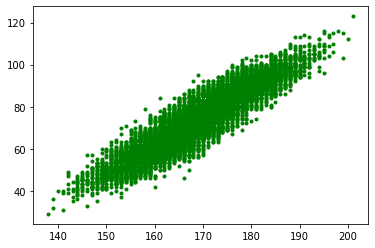

In [ ]:
plt.plot(data.Height, data.Weight, "g.")
plt.show()

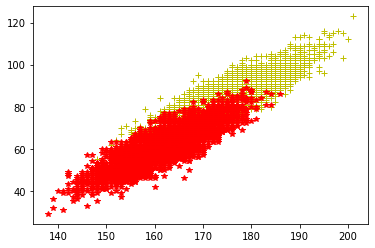

In [ ]:
plt.plot(men.Height, men.Weight, "y+")
plt.plot(women.Height, women.Weight, "r*")
plt.show()

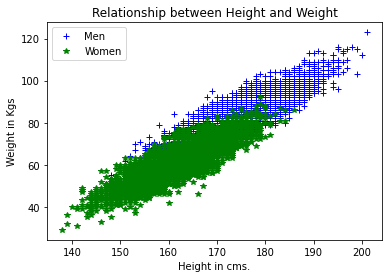

In [ ]:
plt.plot(men.Height, men.Weight, "b+", label = "Men")
plt.plot(women.Height, women.Weight, "g*", label = "Women")

plt.xlabel("Height in cms.")
plt.ylabel("Weight in Kgs")
plt.title("Relationship between Height and Weight")
plt.legend()

plt.show()